In [108]:
%pylab inline
import numpy
from scipy.optimize import curve_fit as fit

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Why 
This is to show the indeterminacy problem with the P3 and P4 pointing problem
with a small range in elevations ($el$)

* P3 is (left-right axis skew = non-perpendicularity of az/el axes) 
and is proportional to $tan(el)$

* P4 is az box offset / collimation error = RF-axis misalignment
and is proportional to $sec(el) = \frac{1}{cos(el)}$

* P7 is elevation offset




In [109]:
def approx(el,p4,p7):
    """
    elevation given in degrees
    approximation is for tan(x) using p4*secant(x)+p7
    """
    a=p4/np.cos(np.deg2rad(el)) +p7
    return a

    

In [130]:
elrange=linspace(15,88,100)
skew = np.tan(np.radians(elrange))

#box=approx(elrange,1.2,-0.4) #close

paras,covar=fit(approx,elrange,skew,p0=[1.2,-0.4])


In [111]:
print "Fitting parameters - scale %6.4f - offset %6.4f" %(paras[0],paras[1])

Fitting parameters - scale 1.0314 - offset -0.4608


In [112]:
#print skew

In [113]:
#print approx(elrange,paras[0],paras[1])

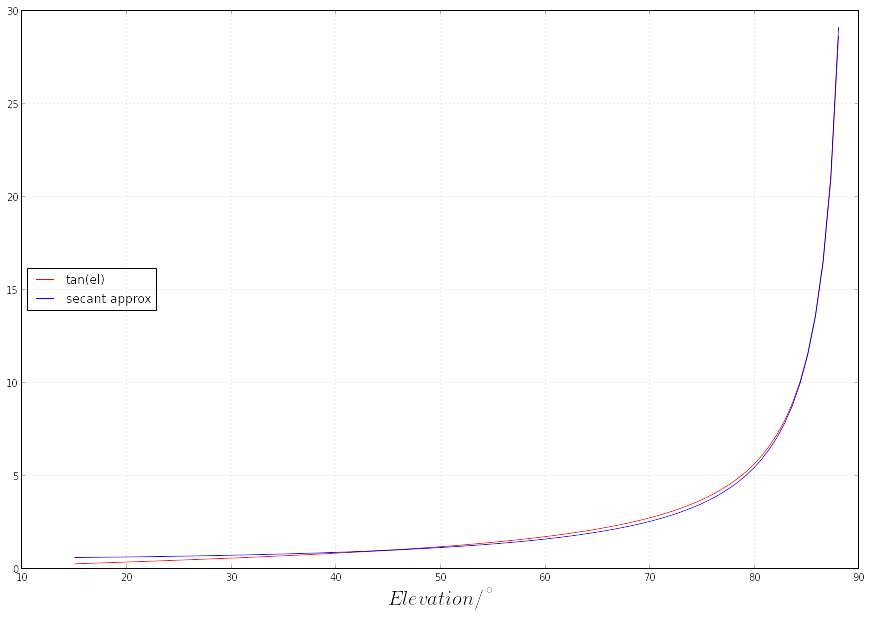

In [129]:
pylab.figure(figsize=[15,10])
pylab.plot(elrange,skew,'r-',label="tan(el)")
pylab.plot(elrange,approx(elrange,paras[0],paras[1]),'b-',label='secant approx')
pylab.xlabel('$Elevation/^{\circ}$',fontsize=20)
pylab.grid()
pylab.legend(loc='center left')
pylab.show()

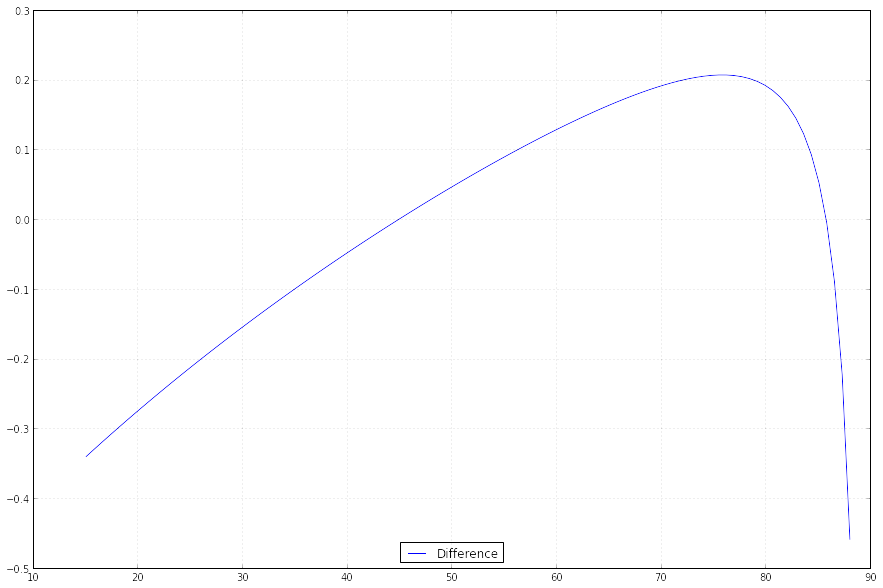

In [126]:
pylab.figure(figsize=[15,10])
pylab.plot(elrange,skew-approx(elrange,paras[0],paras[1]),'b-',label="Difference")
pylab.grid()
pylab.legend(loc='lower center')
pylab.show()

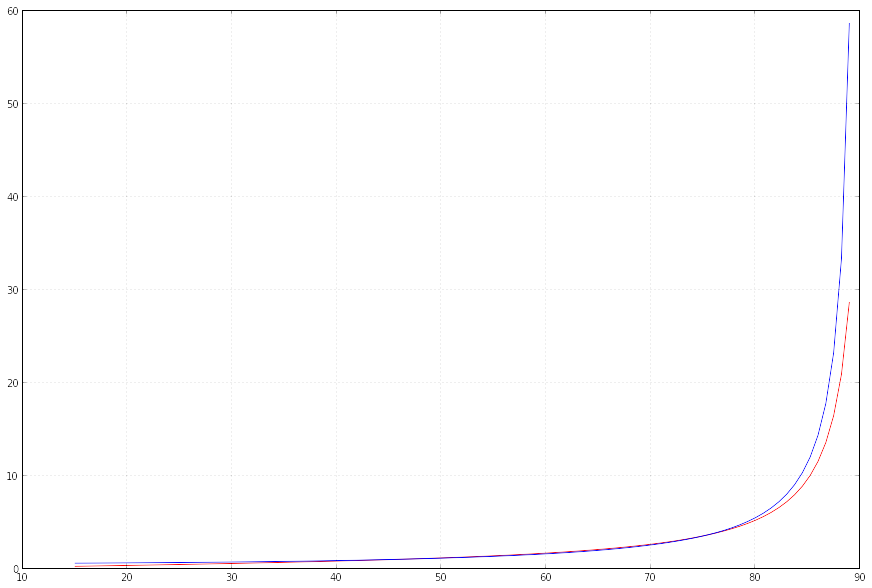

In [116]:
max_elrange=linspace(15,89,100)
pylab.figure(figsize=[15,10])
#pylab.grid()
pylab.plot(max_elrange,skew,'r-')
pylab.plot(max_elrange,approx(max_elrange,paras[0],paras[1]),'b-')
pylab.grid()
pylab.show()

In [117]:
# Fractional error

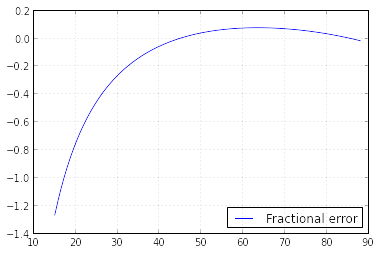

In [133]:
frac_errors=(skew-approx(elrange,paras[0],paras[1]))/skew
pylab.plot(elrange,frac_errors,label="Fractional error")
pylab.legend(loc='lower right')
pylab.show()

# Similarly
we can also fit secant values with tan approximation

In [134]:
def aptan(el,a,b):
    """
    elevation given in degrees
    approximation is for sec using a*tan(el)+b
    """
    apt=a*np.tan(np.deg2rad(el)) +b
    return apt

In [138]:
box=1/np.cos(np.radians(elrange))
p1,cov1=fit(aptan,elrange,box)

In [150]:
print "Fit gives sec(x) approx %5.4f*tan(x)+%5.4f" %(p1[0],p1[1])

Fit gives sec(x) approx 0.9679*tan(x)+0.4511


In [151]:
#print box,aptan(elrange,p1[0],p1[1])

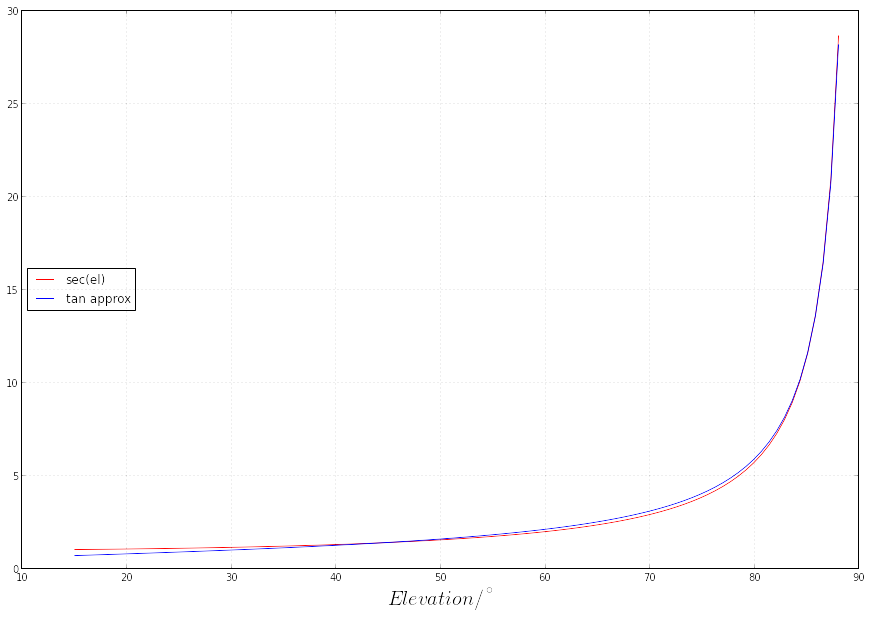

In [152]:
pylab.figure(figsize=[15,10])
pylab.plot(elrange,box,'r-',label="sec(el)")
pylab.plot(elrange,aptan(elrange,p1[0],p1[1]),'b-',label='tan approx')
pylab.xlabel('$Elevation/^{\circ}$',fontsize=20)
pylab.grid()
pylab.legend(loc='center left')
pylab.show()

[[  1.75586779e-05  -5.43763211e-05]
 [ -5.43763211e-05   4.67853343e-04]]
